In [1]:
import numpy as np, scipy as sp, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

/Users/mglerner/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
y1_coeffs = [1, 0, 0,
             1/(2*3), 0, 0,
             1/(2*3*5*6), 0, 0,
             1/(2*3*5*6*8*9), 0, 0,
             ]
y2_coeffs = [0, 1/(3*4), 0,
             0, 1/(3*4*6*7), 0,
             0, 1/(3*4*6*7*9*10), 0]

def get_y1_coeffs(n):
    result = [1,]
    for i in range(1,n):
        if divmod(i,3)[1] == 0:
            denom = 1
            for j in range(1,i+1):
                if divmod(j-1,3)[1] == 0:
                    pass
                else:
                    denom = denom * j
            result.append(1/denom)
        else:
            result.append(0)
    return result

In [4]:
from ipywidgets import interact

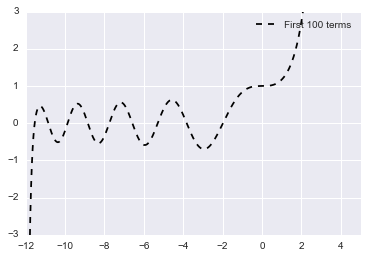

In [38]:
def plot_airy1(n=100):
    a0 = 1
    x = np.linspace(-12,5,10000)
    y = np.zeros_like(x)
    for i,coeff in enumerate(get_y1_coeffs(n)):
        y = y + (x**i)*coeff
    plt.plot(x,y,'k--',label="First {n} terms".format(n=n))
    #plt.plot(x,sp.special.airy(x)[2]+sp.special.airy(x)[3],label="full solution (ish)")
    #plt.plot(x,sp.special.airy(x)[0],label='0')
    #plt.plot(x,sp.special.airy(x)[1],label='1')
    #plt.plot(x,sp.special.airy(x)[2],label='2')
    #plt.plot(x,sp.special.airy(x)[3],label='3')
    plt.axis([-12,5,-3,3])
    
    plt.legend()

interact(plot_airy1,n=(0,100))